## **1.0 Data Understanding**

In [1]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
sns.set(style='whitegrid', palette='deep')

### **Dataset Description**
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [2]:
# Loading the dataset
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
# Display the first few rows
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
# Display a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataset contains 21597 entries and 21 columns with 19 being numerical columns and 2 being categorical columns. The two categorical columns; date and sqft_basement need to be changed to date and a numerical columns respectively since they are not accurately represented as categorical columns.

In [5]:
# Display summary statistics for numerical features
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [6]:
# Check unique values
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [7]:
# Check duplicated items
df.duplicated().sum()

0

In [8]:
# Unique values for categorical features
print(df['waterfront'].value_counts())
print(df['view'].value_counts())
print(df['condition'].value_counts())
print(df['grade'].value_counts())

0.0    19075
1.0      146
Name: waterfront, dtype: int64
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

waterfront      2376
view              63
yr_renovated    3842
dtype: int64


## **2.0 Data Cleaning and Preprocessing**

### **2.1 Handling Missing Values**

In [10]:
# Check for missing values
df.isnull().sum() * 100 / len(df)

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

- Since waterfront is a binary variable with 0 indicating the property does not have a waterfront view and 1 indicating the property has a waterfront, filling the missing values with 0 would be the best approach since most houses do not have a waterfront.
- For view, since the null/missing values make up about 0.3% of the column, we can drop the rows with these missing values.
- For sqft_basement, we can assume that missing values indicate properties without basements and therefore impute the missing values with 0.
- Missing values for the yr_renovated column may suggest the properties have not been renovated. We will therefore impute the missing values with 0.

In [11]:
# Handling missing values
df['waterfront'].fillna(0, inplace=True)  # Assuming NaN means no waterfront
df['sqft_basement'].fillna(0, inplace=True)  # Assuming NaN means no basement
df['yr_renovated'].fillna(0, inplace=True)  # Assuming NaN means no renovation
df.dropna(subset=['view'], inplace=True)

# Check missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### **2.2 Data Transformation**

In [12]:
# Convert 'date' to datetime format and extract year and month
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Convert 'sqft_basement' from object to numeric (handling '?' values)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
df['sqft_basement'].fillna(0, inplace=True)  # Replace NaN (from non-numeric values) with 0

In [13]:
# Convert numerical categorical variables to categorical type
df['waterfront'] = df['waterfront'].astype('object')
df['view'] = df['view'].astype('object')
df['condition'] = df['condition'].astype('object')
df['grade'] = df['grade'].astype('object')

In [14]:
# Checking the row where bedrooms are 33
df[df['bedrooms'] == 33]

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895 2014-06-25  640000.0        33       1.75         1620   

       sqft_lot  floors waterfront view  ... sqft_basement yr_built  \
15856      6000     1.0          0    0  ...         580.0     1947   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
15856           0.0    98103  47.6878 -122.331           1330        4700   

       year  month  
15856  2014      6  

[1 rows x 23 columns]

The row where the bedrooms are 33 is priced at 640000 with 1.75 bathroom indicating the 33 might have been a typo hence we need to change it to 3.

In [15]:
# Replacing the row with 33 bedrooms to 3
df['bedrooms'] = df['bedrooms'].replace(33, 3)

### **2.3 Checking for Duplicates**

In [16]:
# Find and display duplicated records based on 'id'
duplicates = df[df.duplicated(subset=['id'], keep=False)].sort_values(by='id')

# Count the number of duplicated records
duplicates_len = len(duplicates)

# Display results
print(f"Results:\nThere are {duplicates_len} duplicated records based on 'id'.")

Results:
There are 353 duplicated records based on 'id'.


### **2.4 Dropping Unecessary Columns**

In [17]:
# Drop the 'id' column from df
df.drop('id', inplace=True, axis=1)

These 353 rows may indicate that the same house may have been bought and renovated and sold again. We can keep these values since they may all represent different prices helping us in our analysis.

## **3.0 Exploratory Data Analysis (EDA)**

In [18]:
def plot_data(df, columns, plot_type='boxplot', num_cols=4):
    """
    Plot various types of plots for specified columns in a DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - columns: List of column names to plot.
    - plot_type: Type of plot to create ('boxplot', 'histogram', 'countplot',
                 'scatter', 'jointplot', 'pairplot', 'barplot').
                 Default is 'boxplot'.
    - num_cols: Number of columns in the subplot grid. Default is 4.
    """
    # Calculate the number of rows needed
    num_features = len(columns)
    num_rows = int(np.ceil(num_features / num_cols))

    # Create a figure with enough space for all features
    plt.figure(figsize=(num_cols * 5, num_rows * 4))

    # Create subplots for each feature
    for i, feature in enumerate(columns, 1):
        plt.subplot(num_rows, num_cols, i)  # Dynamic grid size

        # Plot based on plot_type
        if plot_type == 'boxplot':
            if df[feature].dtype == 'object':
                sns.boxplot(x=feature, y='price', data=df)
                plt.title(f'Boxplot of {feature} vs Price')
            else:
                sns.boxplot(x=df[feature])
                plt.title(f'Boxplot of {feature}')
        elif plot_type == 'histogram':
            sns.histplot(x=df[feature], kde=True)
            plt.title(f'Histogram of {feature}')
        elif plot_type == 'countplot':
            sns.countplot(x=df[feature])
            plt.title(f'Countplot of {feature}')
        elif plot_type == 'scatter':
            sns.scatterplot(x=df[feature], y=df['price'])
            plt.title(f'Scatter plot of {feature} vs Price')
            plt.xlabel(feature)
            plt.ylabel('Price')
        elif plot_type == 'jointplot':
            sns.jointplot(x=feature, y='price', data=df, kind='scatter')
            plt.title(f'Joint plot of {feature} vs Price')
        elif plot_type == 'pairplot':
            sns.pairplot(df[columns])
        elif plot_type == 'barplot':
            sns.barplot(x=feature, y='price', data=df)
            plt.title(f'Barplot of {feature} vs Price')


        plt.xlabel(feature)
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

# Example usage:
# Define your DataFrame and columns to plot
# Assuming kc_housing_data and numerical_cols are defined in your environment
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

### **3.1 Univariate Analysis**

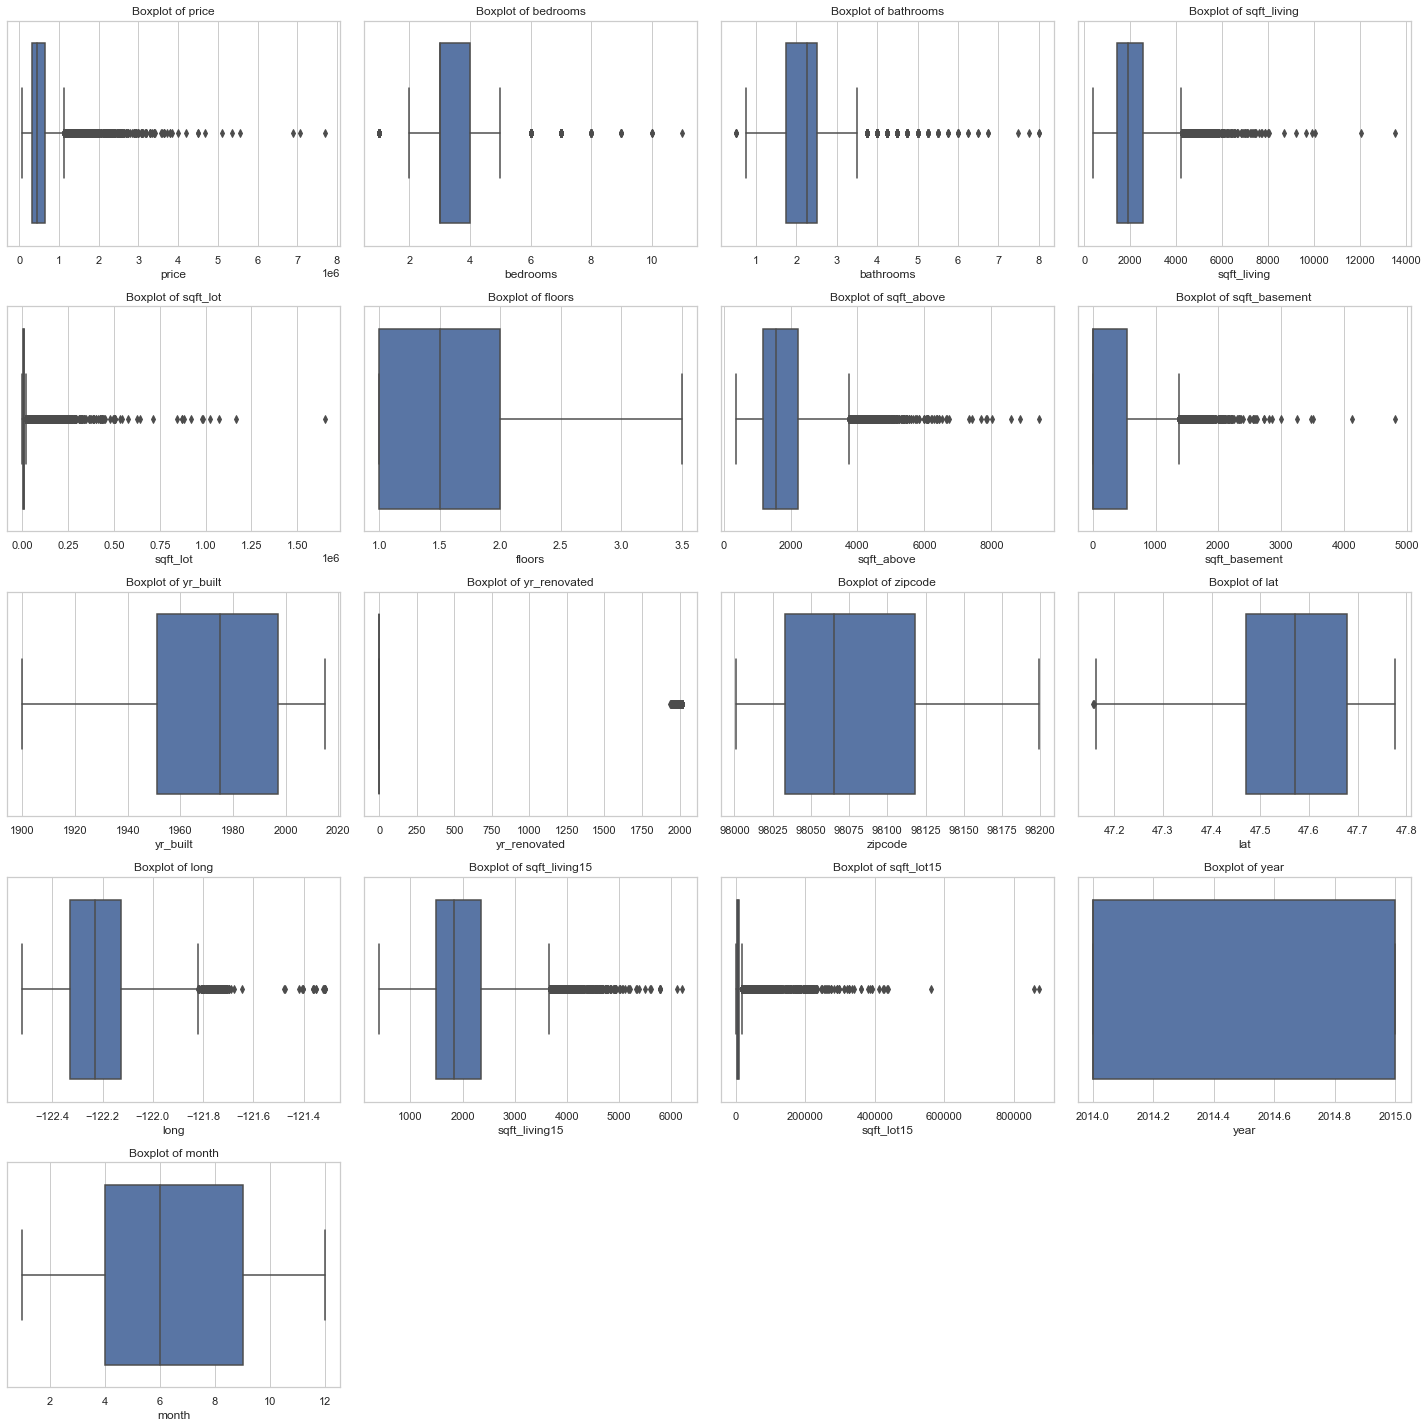

In [19]:
# Plot boxplots for numerical columns
plot_data(df, numerical_cols, plot_type='boxplot')

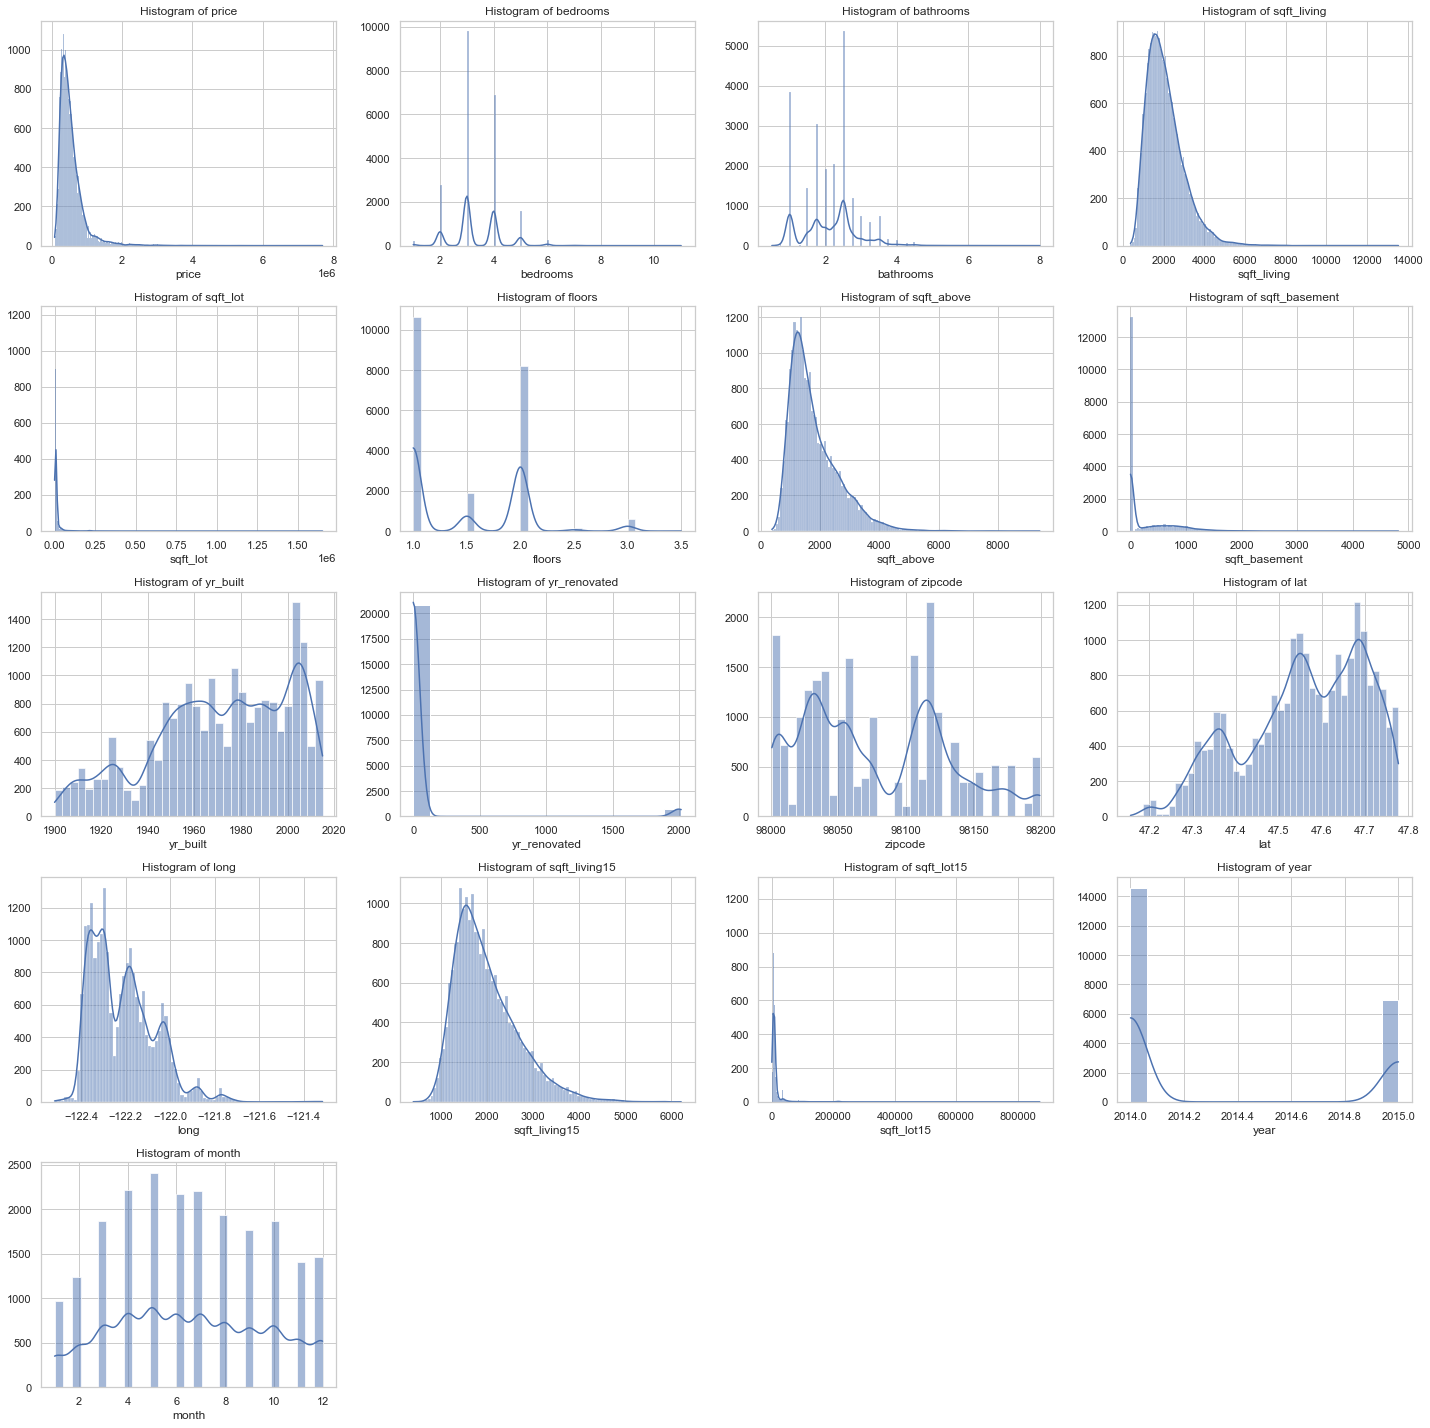

In [20]:
# Plot histograms for numerical columns
plot_data(df, numerical_cols, plot_type='histogram')

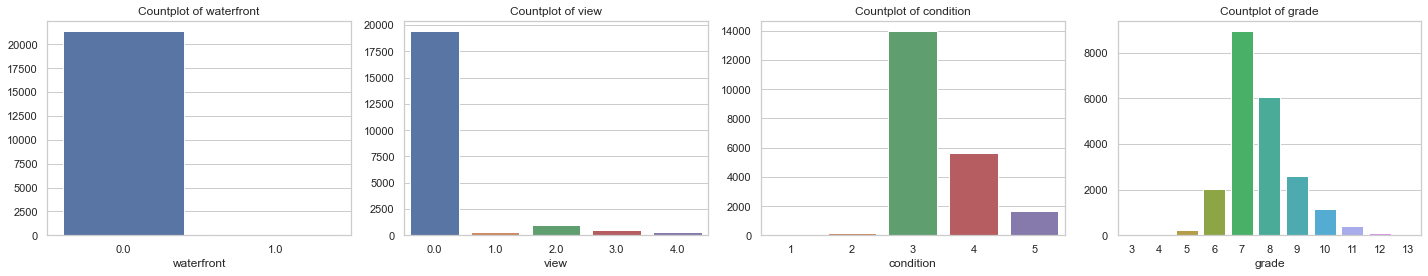

In [21]:
# Plot count plots for categorical columns
plot_data(df, categorical_cols, plot_type='countplot')

### **3.2 Bivariate Analysis**

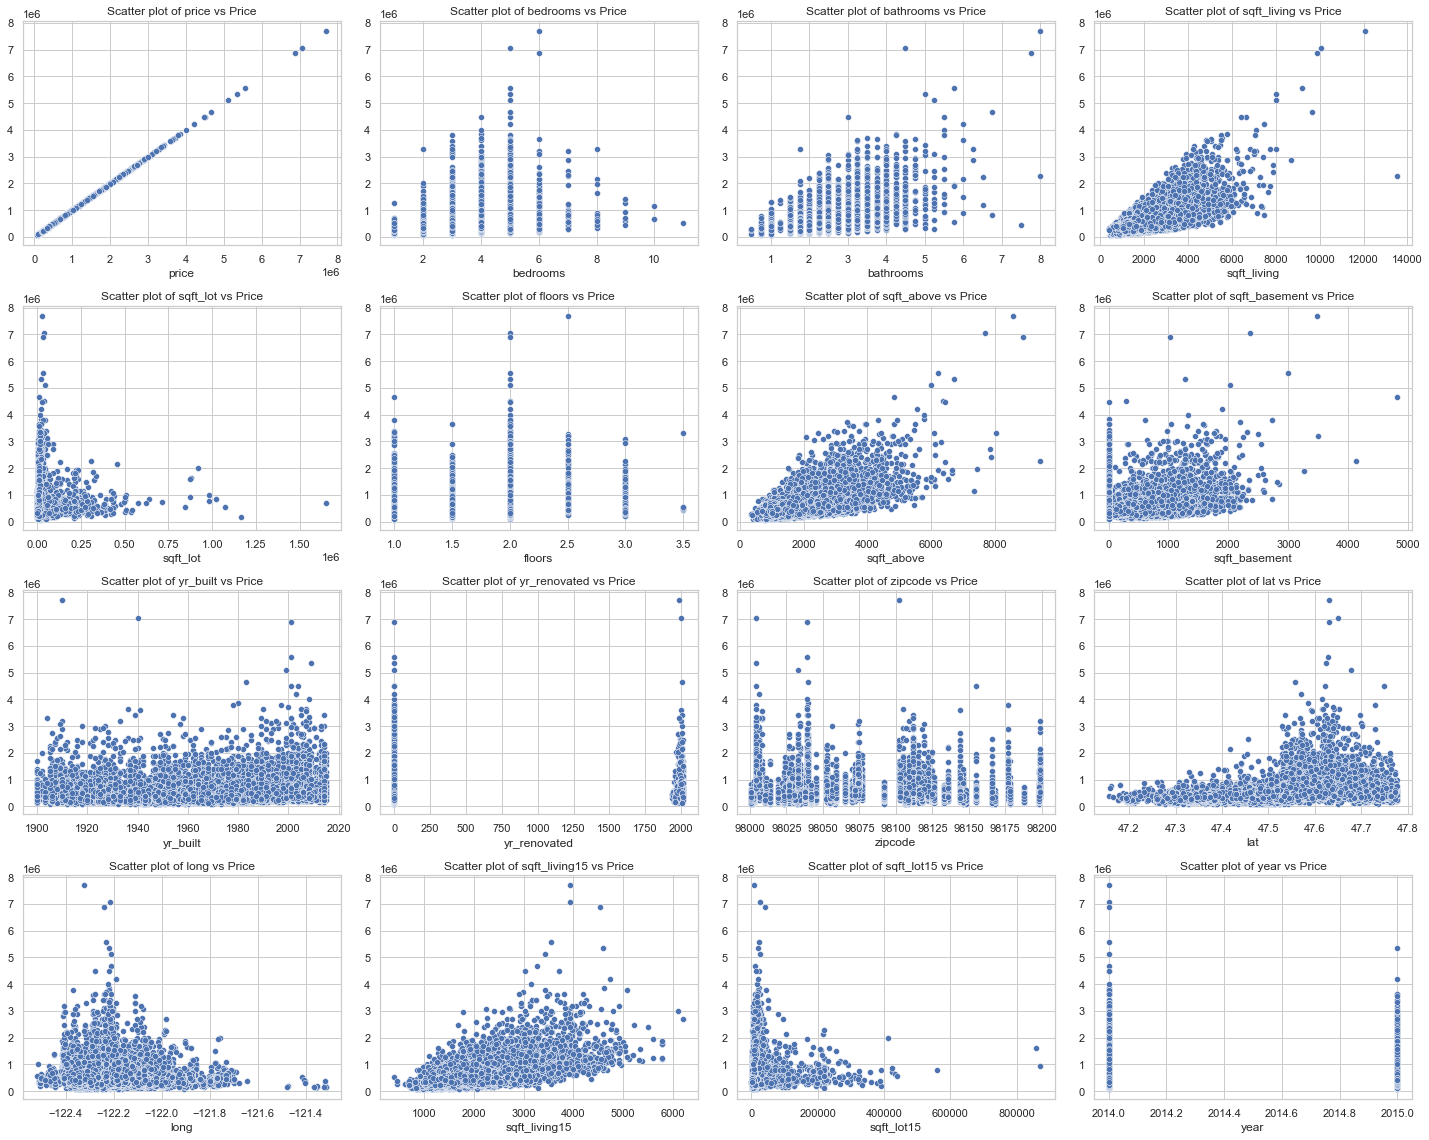

In [22]:
# Plot scatter plots for numerical columns vs 'price'
plot_data(df, numerical_cols[:-1], plot_type='scatter')

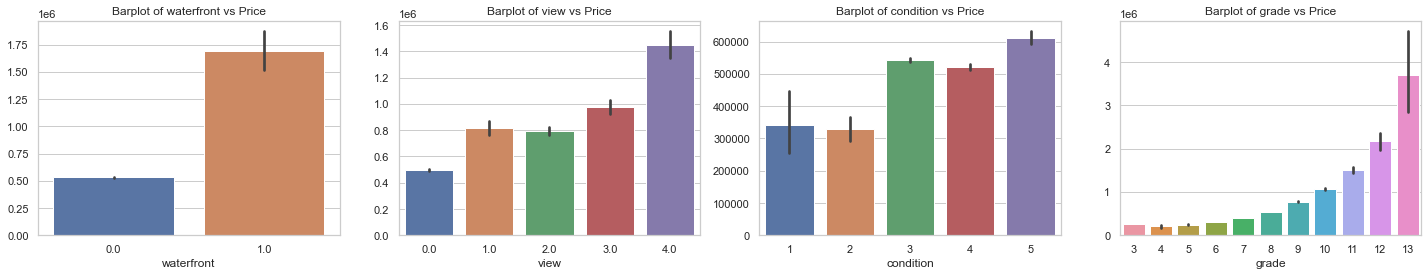

In [23]:
# Plot bar plots for categorical columns vs 'price'
plot_data(df, categorical_cols, plot_type='barplot')

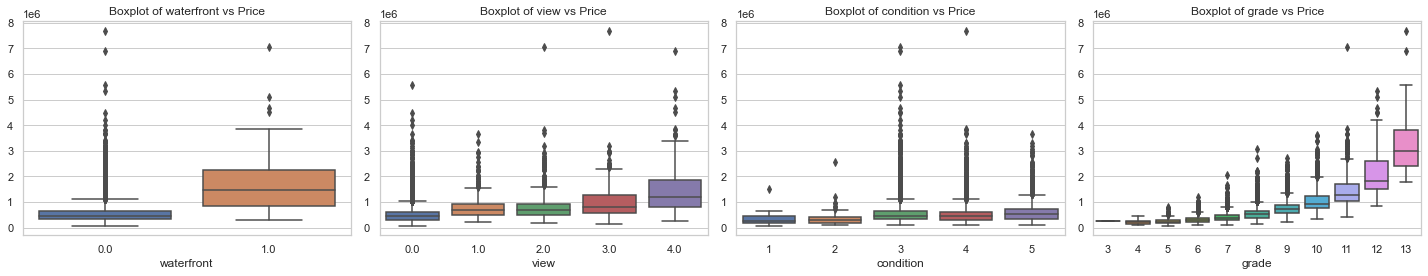

In [24]:
# Plot bar plots for categorical columns vs 'price'
plot_data(df, categorical_cols, plot_type='boxplot')

In [25]:
# Create a scatter plot of house prices
import plotly.express as px

fig = px.scatter_geo(df,
                     lat='lat',
                     lon='long',
                     color='price',
                     color_continuous_scale='viridis',
                     title='House Prices by Location',
                     labels={'price': 'Price'},
                     projection='natural earth')

# Show the plot
fig.show()

### **3.3 Multivariate Analysis**

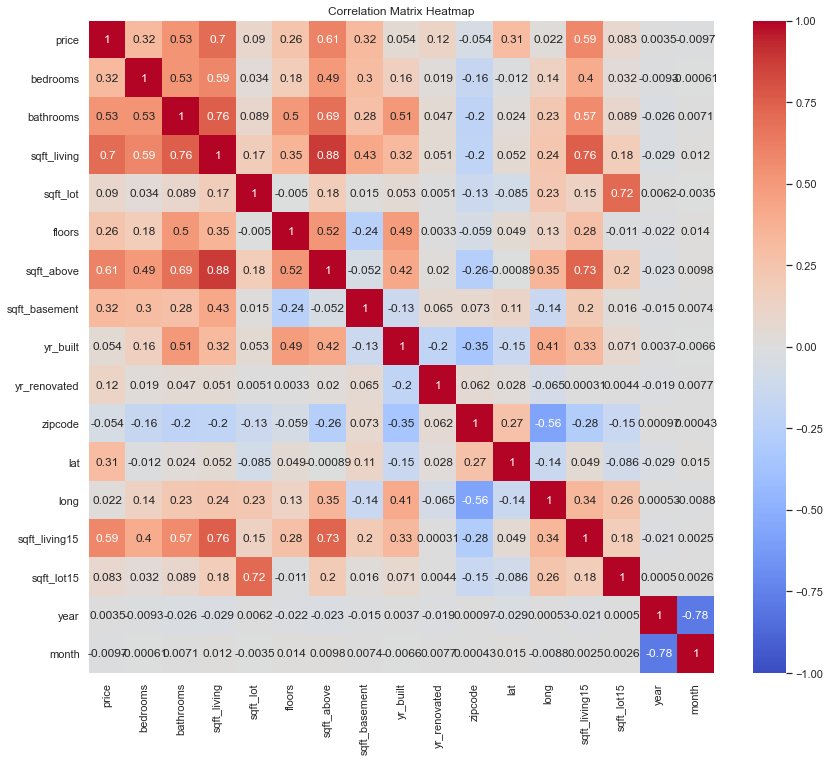

In [26]:
# Correlation heatmap of columns
correlation_matrix =  df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [27]:
# setting the target variable as price; check how the predictor variables correlate with price and identify the highest correlated

df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701587
sqft_above       0.605695
sqft_living15    0.585304
bathrooms        0.525053
sqft_basement    0.319082
bedrooms         0.315229
lat              0.307868
floors           0.257052
yr_renovated     0.117982
sqft_lot         0.090338
sqft_lot15       0.083189
yr_built         0.054273
long             0.022417
year             0.003548
month           -0.009691
zipcode         -0.053620
Name: price, dtype: float64

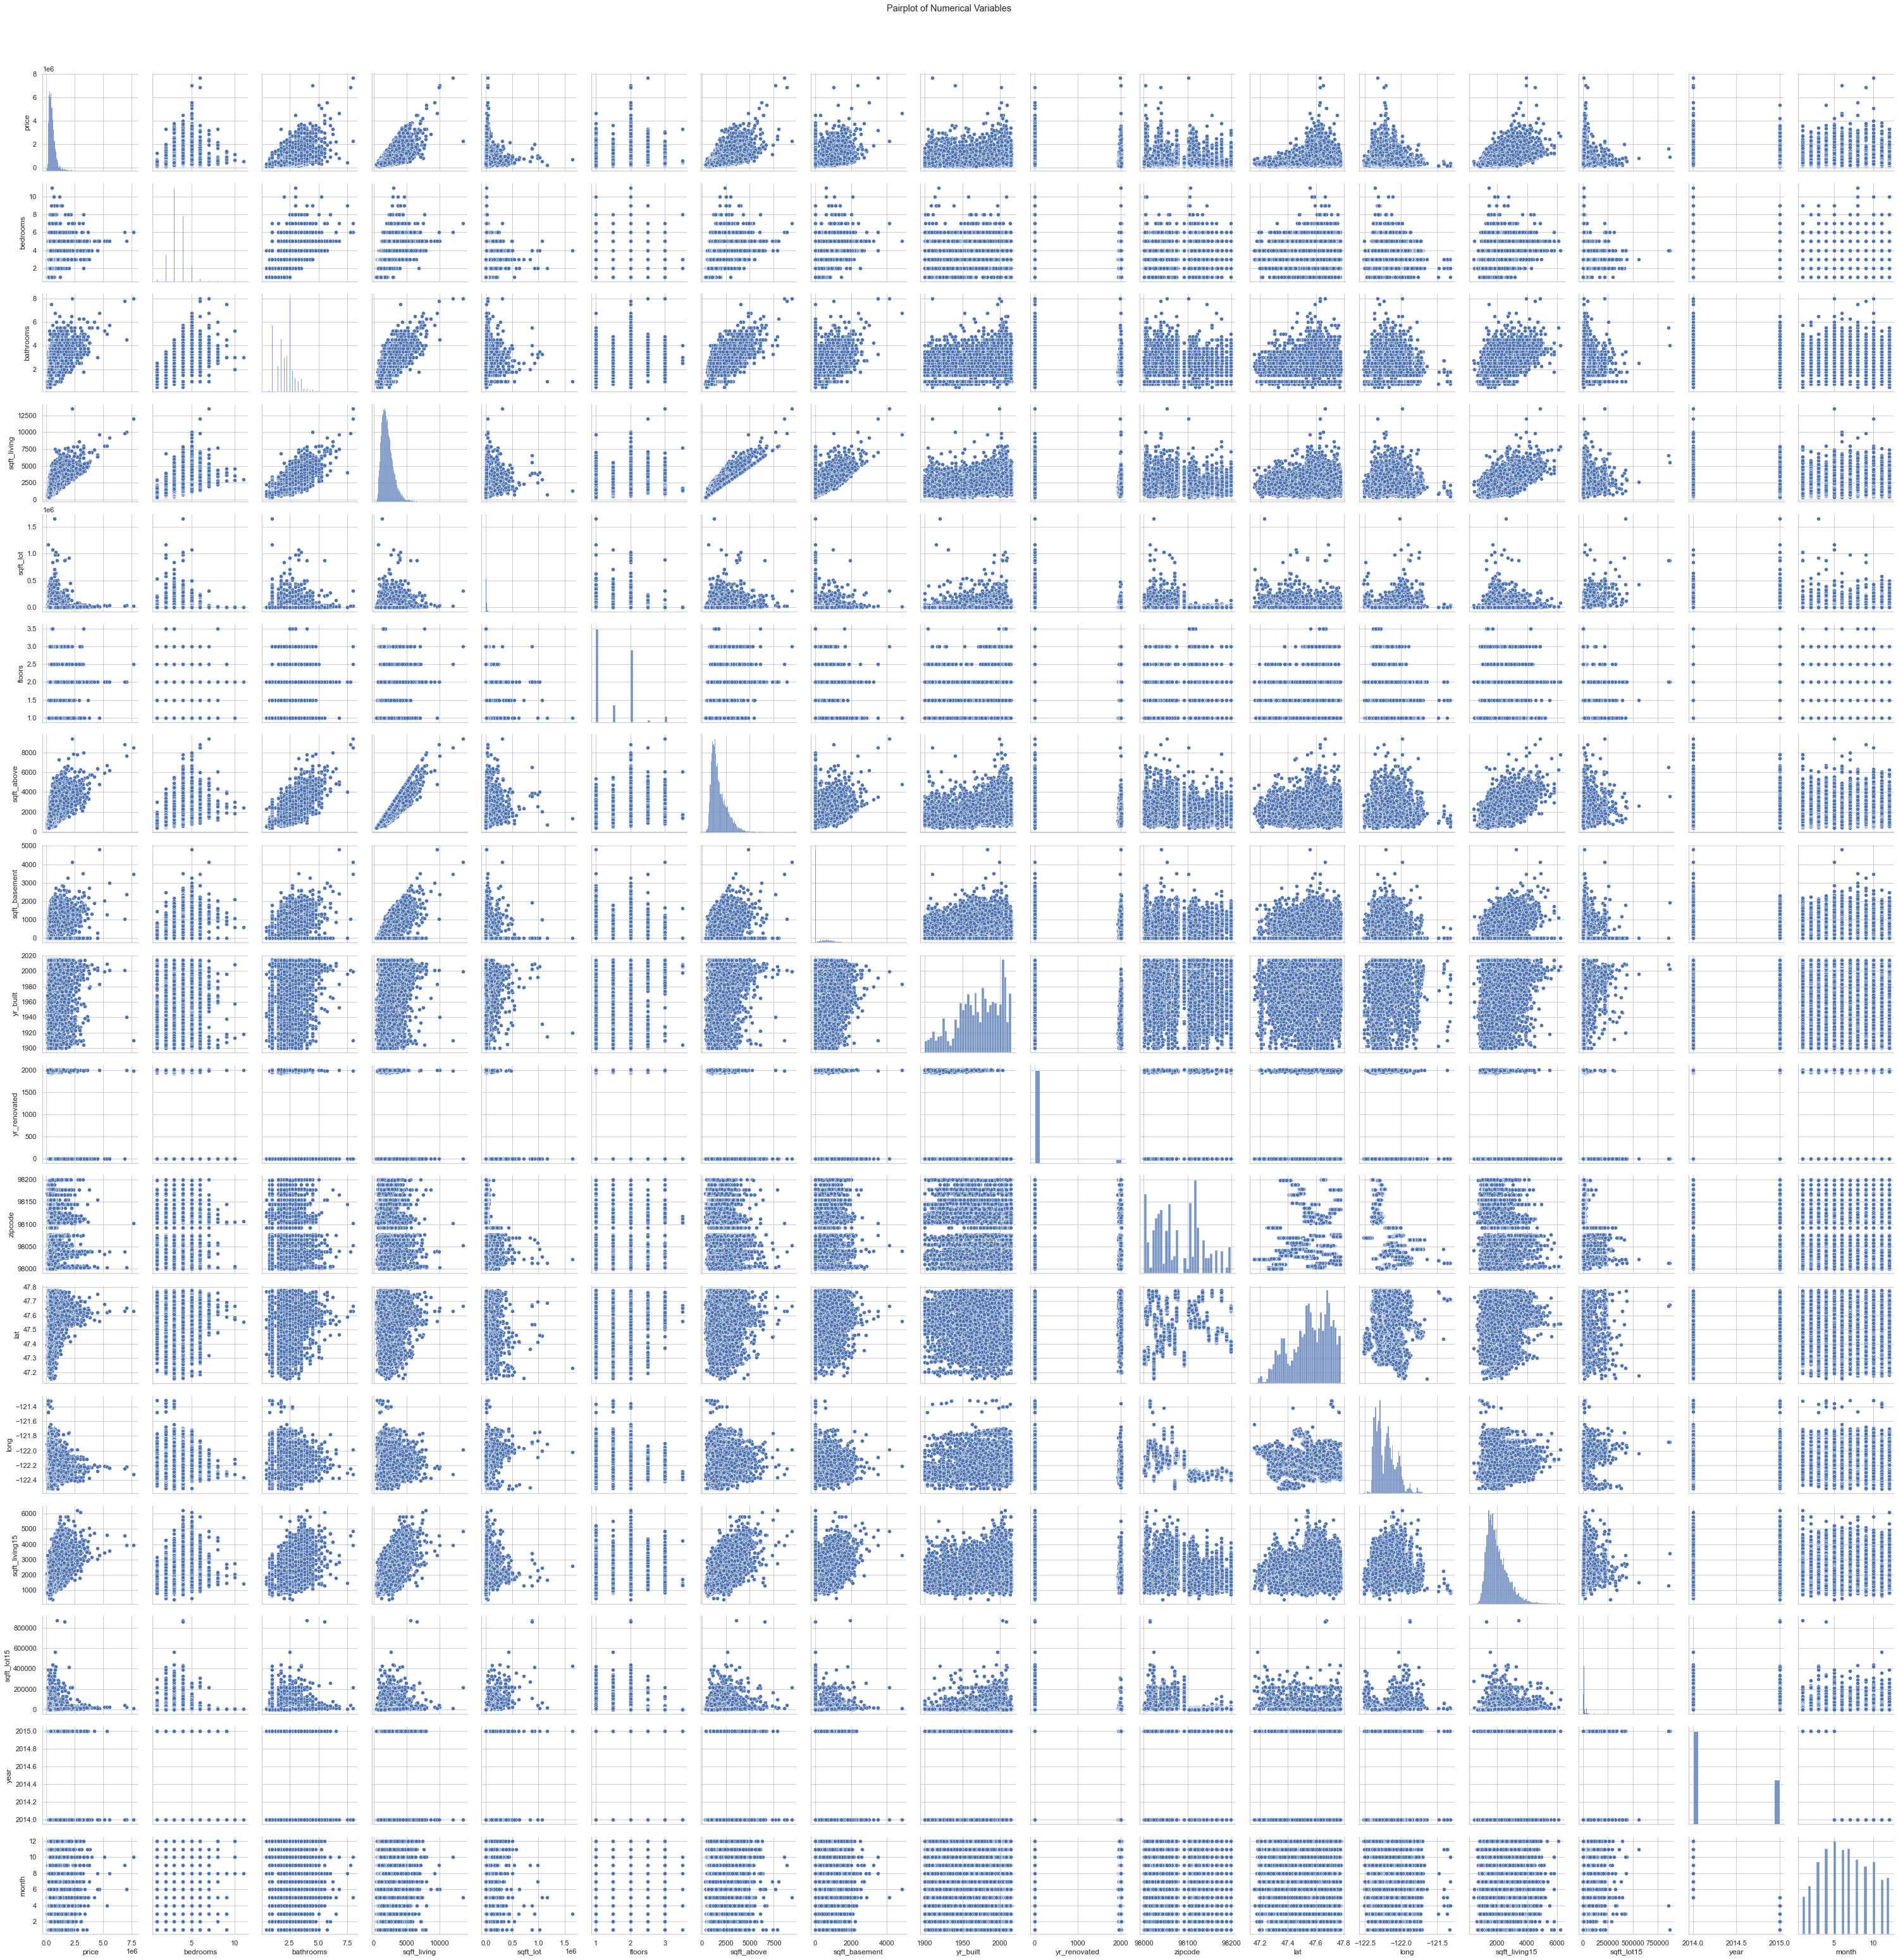

In [28]:
# Plotting pairplot
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

## **4.0 Feature Selection**

In [29]:
# Removing Outliers from Price
# Calculate Q1, Q3 and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Print the shape to see how many rows were removed
print("Original shape:", df.shape)
print("Shape after removing outliers:", df.shape)

Original shape: (20381, 22)
Shape after removing outliers: (20381, 22)


In [30]:
# Changing the objects to numerical values
df['waterfront'] = df['waterfront'].astype('int64')
df['view'] = df['view'].astype('int64')
df['condition'] = df['condition'].astype('float')
df['grade'] = df['grade'].astype('int64')

In [31]:
# Calculate colinearity matrix
corr_matrix = df.corr().abs()

# Create a mask to identify pairs of highly correlated features
mask = (corr_matrix >= 0.75) & (corr_matrix < 1.0)

# Extract the pairs of highly correlated features
corr_pairs = []

for col in mask.columns:
    correlated_features = list(mask.index[mask[col]])
    for feat in correlated_features:
        if feat != col:
            pair = (col, feat, corr_matrix.loc[feat, col])
            corr_pairs.append(pair)

# Display the pairs of highly correlated features
for pair in corr_pairs:
    print(f"{pair[0]} - {pair[1]} : {pair[2]:.6f}")

sqft_living - sqft_above : 0.853613
sqft_above - sqft_living : 0.853613
year - month : 0.782607
month - year : 0.782607


In [32]:
# Check once more for nulls
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
dtype: int64

In [33]:
# Save the cleaned dataset
df_new = df.copy()
df_new.to_csv('cleaned_housing_data.csv',index=False)

In [35]:
# Checking cleaned dataset
housing_df = pd.read_csv('../data/cleaned_housing_data.csv')
housing_df.shape

(20381, 22)